# Importação das Bibliotecas Básicas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Exploração dos Dados

In [5]:
base_plano_saude = pd.read_csv(r'C:\Users\brcalazans\Desktop\Pessoal\Machine Learning e Data Science\Bases de dados\plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [6]:
base_plano_saude.tail()

,idade,custo
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [8]:
base_plano_saude.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,10.0,40.5,15.138252,18.0,29.25,40.5,51.75,63.0
custo,10.0,1946.7,1006.071353,871.0,1270.50,1563.0,2373.00,4090.0


In [9]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [11]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [12]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [13]:
X_plano_saude.shape

(10,)

In [15]:
X_plano_saude = X_plano_saude.reshape(-1, 1)
X_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [16]:
X_plano_saude.shape

(10, 1)

In [17]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [19]:
# b0
regressor_plano_saude.intercept_

-558.9490909090912

In [20]:
# b1
regressor_plano_saude.coef_

array([61.86787879])

In [21]:
previsoes = regressor_plano_saude.predict(X_plano_saude)

In [22]:
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [25]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [37]:
grafico = px.scatter(x = X_plano_saude.ravel(), y= y_plano_saude)
grafico.add_scatter(x=X_plano_saude.ravel(), y=previsoes, name="Regressão")
grafico.show()

In [38]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [40]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [41]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

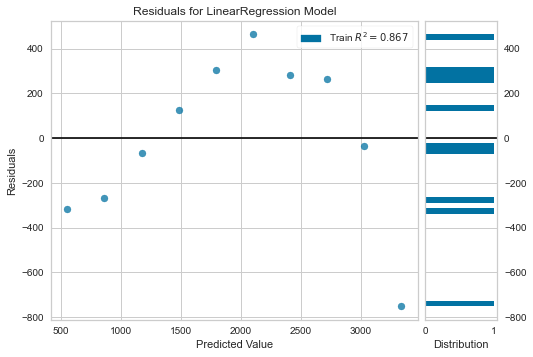

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()